In [1]:
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt

# Twitter Data Wrangline Project

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Gathering">Gathering</a></li>
<li><a href="#Assessing">Assessing</a></li>
<li><a href="#Cleaning">Cleaning</a></li>
<li><a href="#Storing, Analyzing and Visualizing">Storing, Analyzing and Visualizing</a></li>
</ul>

<a id='Introduction'></a>
## Introduction

The purpose of this project is to practice what I learned from the data wrangling section of Udacity Data Analysis Nanodegree. The wrangled data is from dog tweet archives from twitter.

<a id='Gathering'></a>
## Gathering

<ol>
    <li> <b> Twitter archive file: </b> downloaded manually.</li>
  <li> <b> Tweet image prediciton: </b> downloaded programmatically via url given by Udacity.</li>
  <li> <b> Twitter JSON text data: </b> downloaded manually </li>
</ol>

### 1. Tweet Archive File

Downloaded this csv file manually from Udacity.

In [2]:
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Tweet Image Prediction

Given a link from Udacity, I downloaded the tsv programatically, if someone wants to run my code they do not have to fetch the tsv file link and download it manually.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

imgpred_df = pd.read_csv('image-predictions.tsv', sep='\t')

### 3. Twitter JSON text data

Downloaded the tweet_json.txt from the udacity course page. Then I read in in the first line of tweet_json to get the first json object. After getting the first json object I used its keys to get the columns of the data frame. Then I created an empty dataframe with those columns. I also noticed that there were keys that were multilevel. For convenience, I removed those keys because that would be too complicated. Once I got an empty dataframe and list of columns, I read the entire dataframe line by line extracting all the rows from json of the tweets.

In [4]:
with open('tweet_json.txt', 'r') as f:
    txt = f.readline()
json_temp = json.loads(txt)
keys = list ( json_temp.keys() )
bad_keys = ['user', 'entities','extended_entities','source']
for k in bad_keys :
    keys.remove(k)
columns = keys

with open('tweet_json.txt', 'r') as f:
    df = pd.DataFrame((json.loads(line) for line in f), columns = columns)
tweet_df = df.copy()
tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]",NaN,None,NaN,None,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]",NaN,None,NaN,None,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]",NaN,None,NaN,None,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]",NaN,None,NaN,None,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]",NaN,None,NaN,None,...,None,None,False,9774,41048,False,False,False,False,en


<a id='Assessing'></a>
## Assessing

I assess the data visually, programatically and try to find tidiness and quality issues to fix.

### Visual Assesment

Display each of the data in the jupyter notebook and try to find problems thru just glancing at them.

In [5]:
enhanced_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
imgpred_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
tweet_df

,created_at,id,id_str,full_text,truncated,display_text_range,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]",NaN,None,NaN,None,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]",NaN,None,NaN,None,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]",NaN,None,NaN,None,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]",NaN,None,NaN,None,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]",NaN,None,NaN,None,...,None,None,False,9774,41048,False,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]",NaN,None,NaN,None,...,None,None,False,41,111,False,False,False,False,en
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]",NaN,None,NaN,None,...,None,None,False,147,311,False,False,False,False,en
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]",NaN,None,NaN,None,...,None,None,False,47,128,False,False,False,False,en
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]",NaN,None,NaN,None,...,None,None,False,48,132,False,False,False,False,en


### Programmatic Assesment

Use pandas functions to play with the data and see any issues.

<b> Beginning with the archived tweets dataframe </b>

In [8]:
enhanced_df.info()
#I noticed that a couple tweets were in replies and retweeted. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
#How many tweets are duplicated
enhanced_df.tweet_id.duplicated().sum()

0

In [10]:
enhanced_df.rating_numerator.value_counts()
#it seems like there a lot of different numerators that are not <=10.
#I will probably bin them or something later

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
enhanced_df.rating_denominator.value_counts()
#there seems to be a few denominators not equal to 10

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#WHAT ARE THE DISTRIBUTIONS OF THESE COLUMNS
print(enhanced_df.doggo.value_counts(), end='\n\n\n')
print(enhanced_df.floofer.value_counts(), end='\n\n\n')
print(enhanced_df.pupper.value_counts(), end='\n\n\n')
print(enhanced_df.puppo.value_counts(), end='\n\n\n')
# We can observed that most of the rows are unlabeled for all 3 of these columns
# Don't seem like very insightful columns if most dogs are unlabeled

None     2259
doggo      97
Name: doggo, dtype: int64


None       2346
floofer      10
Name: floofer, dtype: int64


None      2099
pupper     257
Name: pupper, dtype: int64


None     2326
puppo      30
Name: puppo, dtype: int64




<b> Second on to the image prediction dataframe. </b>

In [13]:
imgpred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
#check for multiple of the same image
imgpred_df.jpg_url.duplicated().sum()

66

In [15]:
#WHAT ARE THE DISTRIBUTIONS OF THESE COLUMNS
print(imgpred_df.p1_dog.value_counts(), end='\n\n\n')
print(imgpred_df.p2_dog.value_counts(), end='\n\n\n')
print(imgpred_df.p3_dog.value_counts(), end='\n\n\n')
print(imgpred_df.img_num.value_counts(), end='\n\n\n')

True     1532
False     543
Name: p1_dog, dtype: int64


True     1553
False     522
Name: p2_dog, dtype: int64


True     1499
False     576
Name: p3_dog, dtype: int64


1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64




<b> Lastly on to the with the json tweet dataframe. </b>

In [16]:
tweet_df.info()
#noticed a bunch of columns with all nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   in_reply_to_status_id          78 non-null     float64
 7   in_reply_to_status_id_str      78 non-null     object 
 8   in_reply_to_user_id            78 non-null     float64
 9   in_reply_to_user_id_str        78 non-null     object 
 10  in_reply_to_screen_name        78 non-null     object 
 11  geo                            0 non-null      object 
 12  coordinates                    0 non-null      o

In [17]:
tweet_df.retweeted.value_counts()
#no retweets

False    2354
Name: retweeted, dtype: int64

<b> Archived Tweets: </b>
<ul>
<li>Remove columns not being analyzed. </li>
<li>Separate timestamp into 3 columns -> month, day, and year.
<li>Remove denominators that are not 10. </li>
<li>Make reasonable numerators that have decimals. </li>
<li>Remove all unoriginal tweets. </li>
<li>Make object columns (doggo, floofer, pupper, and puppo) into one column (TIDINESS ISSUE 1) </li>
</ul>

<b> Image Prediction: </b>
<ul>
<li>Deal with duplicate JPG. </li>
<li>Remove columns that are not used for analysis </li>
<li>Deal with the p1, p2, p3 columns that are very confusing. Create one column for prediction and one for confidence level. </li>
</ul>

<b> Tweet JSON: </b>
<ul>
<li>Get actual text size instead of text range. </li>
<li>Remove columns that are not used for analysis </li>
</ul>

<li>All tables 3 tables should just be 1 (TIDINESS ISSUE 2)</li>

<a id='Cleaning'></a>
## Cleaning

Fix all these issues one by one. I am mostly cleaning programatically. 

**WE WILL BEGIN WITH THE ENANCED_ARCHIVE DATAFRAME**

In [18]:
enhanced_df_cleaned = enhanced_df.copy()

<b> Remove all unoriginal tweets in the archived tweets dataframe </b>


**Define:** As we can see there 181 non-null values for retweet_status_id, retweet_status_user_id, and retweet_status_timestamp. We need to remove these rows because they are retweets.

In [19]:
enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
#Code
enhanced_df_cleaned = enhanced_df_cleaned[ enhanced_df_cleaned.retweeted_status_id.isna() ]

#Test
enhanced_df_cleaned.info()
#as we can see the retweeted columns now have 0 non-nulls
#also, the number of entries went down from 2356 to 2175

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

<b> Keep the denominator constant in the archived tweets dataframe </b>


**Define:** While most columns have a denominator of 10, there are a number of rows with random denominators. To be on the safe side, we removed those rows with denominators other than 10.

In [21]:
enhanced_df_cleaned.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
#Code
enhanced_df_cleaned = enhanced_df_cleaned.query("rating_denominator == 10")

#Test
enhanced_df_cleaned.rating_denominator.value_counts()
#as we can see, now all rows have a denominator value equal to 10

10    2153
Name: rating_denominator, dtype: int64

<b> Make sure the numerator is inside a reasonable range in the archived tweets dataframe </b>


**Define:** As we can see many of the values are between 0 and 10. However, there are way too many values that are 10, 11, 12, 13 and 14, that we cannot just delete all of them. However other values such as 420 and 75 are out of the 0-10 denominator range and rare. As a result I removed all rare values above 10 (410, 75, 26, 182, 27, 1776, 15, 17, and 666.

In [23]:
enhanced_df_cleaned.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
9       155
8        98
7        53
14       43
5        36
6        32
3        19
4        15
2         9
1         7
0         2
420       2
75        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

In [24]:
enhanced_df_cleaned = enhanced_df_cleaned.query("rating_numerator <= 14")
enhanced_df_cleaned.rating_numerator.value_counts()

12    500
10    442
11    425
13    307
9     155
8      98
7      53
14     43
5      36
6      32
3      19
4      15
2       9
1       7
0       2
Name: rating_numerator, dtype: int64

**Separate timestamp into 3 different columns, month, day and year.**

**Define:** Convert timestamp to a string and extract the year, month and day and create columns for them.

In [25]:
#Code
enhanced_df_cleaned['year'] = enhanced_df_cleaned['timestamp'].str[:4].astype(int)
enhanced_df_cleaned['month'] = enhanced_df_cleaned['timestamp'].str[5:7].astype(int)
enhanced_df_cleaned['day'] = enhanced_df_cleaned['timestamp'].str[8:10].astype(int)

In [26]:
#Test
enhanced_df_cleaned[['year', 'month', 'day']].describe()
#there seems to be 3 columns created 
#each of these 3 has a reasonable range

,year,month,day
count,2143.000000,2143.000000,2143.000000
mean,2015.863742,7.055530,15.979001
std,0.694857,4.122901,8.936650
min,2015.000000,1.000000,1.000000
25%,2015.000000,3.000000,8.000000
50%,2016.000000,7.000000,16.000000
75%,2016.000000,11.000000,24.000000
max,2017.000000,12.000000,31.000000


**Remove all columns not being analyzed**

**Define:** Compile list of columns that we probably will not analyze and drop them.

In [27]:
#Code
col_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
               'timestamp', 'source', 'text', 'retweeted_status_id',
               'retweeted_status_user_id', 'retweeted_status_timestamp', 
               'expanded_urls', 'name', 'rating_denominator']

enhanced_df_cleaned.drop(columns=col_to_drop, inplace=True)

#TEST
enhanced_df_cleaned.info()
#here we see a new list of columns[]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2143 non-null   int64 
 1   rating_numerator  2143 non-null   int64 
 2   doggo             2143 non-null   object
 3   floofer           2143 non-null   object
 4   pupper            2143 non-null   object
 5   puppo             2143 non-null   object
 6   year              2143 non-null   int64 
 7   month             2143 non-null   int64 
 8   day               2143 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 167.4+ KB


**Convert the object data types to booleans to allow for better analysis**

**Define:** Compile list of object columns and convert them to boolean.

In [28]:
enhanced_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2143 non-null   int64 
 1   rating_numerator  2143 non-null   int64 
 2   doggo             2143 non-null   object
 3   floofer           2143 non-null   object
 4   pupper            2143 non-null   object
 5   puppo             2143 non-null   object
 6   year              2143 non-null   int64 
 7   month             2143 non-null   int64 
 8   day               2143 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 167.4+ KB


In [29]:
#Code
def convert(x):
    list_ = []
    for col in ['doggo', 'floofer', 'pupper', 'puppo'] :
        if x[col] == col:
            list_.append(col)
    if len(list_)==0 :
        return np.nan
    return ','.join(list_)

enhanced_df_cleaned['dog_stage'] = enhanced_df_cleaned.apply(lambda x : convert(x), axis=1)
enhanced_df_cleaned.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)
#TEST
print(enhanced_df_cleaned.dog_stage.value_counts())
enhanced_df_cleaned.info()
#Here we can see the how the dog_stage column actually looks
#We can also see that all the 4 columns have been taken out and replaced with dog_stage

pupper           223
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: dog_stage, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2143 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2143 non-null   int64 
 1   rating_numerator  2143 non-null   int64 
 2   year              2143 non-null   int64 
 3   month             2143 non-null   int64 
 4   day               2143 non-null   int64 
 5   dog_stage         343 non-null    object
dtypes: int64(5), object(1)
memory usage: 117.2+ KB


**NEXT I WANT TO MOVE ON TO THE IMAGE PREDICTION DATAFRAME**

In [30]:
imgpred_df_copy = imgpred_df.copy()

**Remove duplicate images**

**Define:** As we can see, there are 66 different images which are the same because their jpg url is the same

In [31]:
imgpred_df_copy.jpg_url.duplicated().sum()

66

In [32]:
#code
imgpred_df_copy.drop_duplicates(['jpg_url'], keep='last', inplace=True)

#delete duplicates and keep the last one
imgpred_df_copy.jpg_url.duplicated().sum()

0

**Create 2 columns for prediction and prediction confidence**

**Define:** There are 9 different columns (p1_dog, p1_conf, p1....p3) that represent prediction and prediction confidence and you have to read so much just to know so little. Using those 9 columns I had a function to create 2 columns.

In [33]:
#Code
def create_prediction(row) :
    pred_dog, pred_conf = np.nan, np.nan
    if row['p1_dog'] == True :
        pred_dog, pred_conf = row['p1'], row['p1_conf']
    elif row['p2_dog'] == True :
        pred_dog, pred_conf = row['p2'], row['p2_conf']
    elif row['p3_dog'] == True :
        pred_dog, pred_conf = row['p3'], row['p3_conf']
    return pred_dog, pred_conf

imgpred_df_copy[['pred_dog', 'pred_conf']] = pd.DataFrame(imgpred_df_copy.apply(lambda row: create_prediction(row), axis = 1).tolist(), 
                                                     index = imgpred_df_copy.index) 

#Test
imgpred_df_copy.head()
#Here you can see the different 2 new added columns

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_dog,pred_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


**Drop the columns not used for analysis**

**Define:** I am only using 4 columns from this dataframe

In [34]:
col_to_drop = ['jpg_url', 'p1', 'p1_dog', 'p1_conf',
               'p2', 'p2_dog', 'p2_conf', 
               'p3', 'p3_dog', 'p3_conf']
imgpred_df_copy.drop(columns=col_to_drop, inplace=True)
imgpred_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2009 non-null   int64  
 1   img_num    2009 non-null   int64  
 2   pred_dog   1691 non-null   object 
 3   pred_conf  1691 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 78.5+ KB


**NEXT WE MOVE ON TO THE TWEET JSON DATAFRAME**

In [35]:
tweet_df_cleaned = tweet_df.copy()

**Get text size from the display text range column.**

**Define:** The display text range shows the range. What we are really interested in is the size of the text. As a result, we wanted to get the actual size by getting the second number since pretty much all ranges start from 0.

In [36]:
tweet_df_cleaned[['display_text_range']].sample(10)

,display_text_range
2278,"[0, 132]"
1716,"[0, 94]"
1827,"[0, 136]"
240,"[0, 66]"
22,"[0, 99]"
399,"[0, 132]"
1413,"[0, 116]"
1861,"[0, 72]"
1239,"[0, 138]"
1687,"[0, 106]"


In [37]:
#Code
tweet_df_cleaned['display_text_size'] = tweet_df_cleaned['display_text_range'].apply(lambda x: x[1] - x[0])

#Test
tweet_df_cleaned.display_text_size.unique()

array([ 85, 138, 121,  79, 140, 118, 122, 133, 130, 107, 106,  91,  86,
       128,  87, 127, 108,  99,  88, 129, 101,  71, 131,  78,  94,  50,
       109,  47, 134,  93,  66, 136, 104, 137, 112, 139, 111, 114,  67,
       115,  72,  15,  90,  82, 125, 132, 126,  45, 117,  96,  92, 135,
       116,  25,  30, 110,  98, 102,  61, 124,  97, 113,  18, 100,  89,
       119,  81, 105,  75,  48, 103, 143,  95,  63, 144,  44,  51,  46,
         6,  40,  80,  76, 141,  52,  62,  42,  27,  17,  60, 120,  70,
       123,  57,  73,  69,  55,   5,  53,  49,  54,  83,  56,  68,  84,
        74,  41,  32,  13,  59,  39,  38,  77,  58,  64,  35,  43,  26,
       142,  65, 148, 147,  21, 145,  11,  29,  36])

**Drop all the columns not needed for analysis.**

In [38]:
col_to_drop = ['created_at', 'full_text', 'display_text_range', 
               'truncated', 'in_reply_to_status_id',
               'in_reply_to_status_id_str', 'in_reply_to_user_id',
               'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo',
               'coordinates', 'place', 'contributors', 'is_quote_status',
              'favorited', 'retweeted', 'possibly_sensitive', 
               'possibly_sensitive_appealable', 'lang', 'id_str']
tweet_df_cleaned.drop(columns=col_to_drop, inplace=True)
tweet_df_cleaned.columns

Index(['id', 'retweet_count', 'favorite_count', 'display_text_size'], dtype='object')

**LASTLY WE COMBINE ALL THE 3 DATAFRAMES INTO 1 FINAL DATAFRAME.**

In [39]:
df = pd.merge(tweet_df_cleaned.rename({'id': 'tweet_id'}, axis='columns'), 
              enhanced_df_cleaned, on='tweet_id')
df = pd.merge(df, imgpred_df_copy, on='tweet_id')

<a id='Storing, Analyzing and Visualizing'></a>
## Storing, Analyzing and Visualizing

I stored the final cleaned dataframe into a csv file. Then I came up with 4 different insights.

In [40]:
df.to_csv('twitter_archive_master.csv', 
          index=False, encoding = 'utf-8')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1905 non-null   int64  
 1   retweet_count      1905 non-null   int64  
 2   favorite_count     1905 non-null   int64  
 3   display_text_size  1905 non-null   int64  
 4   rating_numerator   1905 non-null   int64  
 5   year               1905 non-null   int64  
 6   month              1905 non-null   int64  
 7   day                1905 non-null   int64  
 8   dog_stage          294 non-null    object 
 9   img_num            1905 non-null   int64  
 10  pred_dog           1606 non-null   object 
 11  pred_conf          1606 non-null   float64
dtypes: float64(1), int64(9), object(2)
memory usage: 193.5+ KB


**INSIGHT 1:** These are the most common dogs in the datasets with #1 as Golden Retriever and #10 as malumute

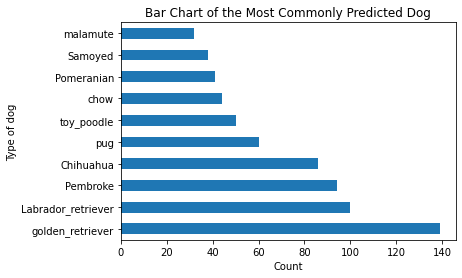

In [42]:
df['pred_dog'].value_counts()[:10].plot(kind = 'barh');
plt.title('Bar Chart of the Most Commonly Predicted Dog');
plt.xlabel('Count');
plt.ylabel('Type of dog');

**Insight #2:** These are the highest and lowest rated dogs.

In [43]:
#Highest
dog_rating = df[['pred_dog', 'rating_numerator']].groupby(['pred_dog'], as_index=False).mean().sort_values(by=['rating_numerator'], ascending=False)
dog_rating.head()

,pred_dog,rating_numerator
11,Bouvier_des_Flandres,13.000000
54,Saluki,12.500000
78,briard,12.333333
31,Irish_setter,12.333333
9,Border_terrier,12.142857


In [44]:
#Lowest
dog_rating.iloc[::-1].head()

,pred_dog,rating_numerator
36,Japanese_spaniel,5.000000
0,Afghan_hound,8.000000
104,soft-coated_wheaten_terrier,8.538462
65,Walker_hound,9.000000
56,Scotch_terrier,9.000000


**Insight #3:**
The number of times a dog is tweeted has no correlation with its average rating. Dogs that were not tweeted much had a much larger distribution having the lowest and highest average ratings, while dogs tweeted often tend be closer to the middle.

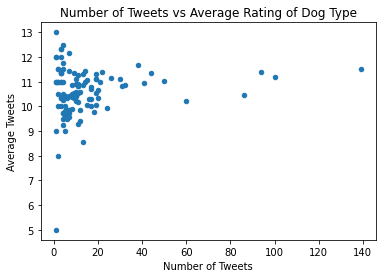

In [45]:
count_df = df['pred_dog'].value_counts().to_frame().reset_index(level=0)
count_rating = pd.merge(count_df, dog_rating, left_on='index', right_on='pred_dog').drop(columns=['index', 'pred_dog_y'])
count_rating.columns = ['count', 'rating']
count_rating.plot.scatter(x='count', y='rating');
plt.title('Number of Tweets vs Average Rating of Dog Type');
plt.xlabel('Number of Tweets');
plt.ylabel('Average Tweets');

**Insight #4:**

Dog tweets with keywords "puppo" "floofer" "pupper" and "doggo" tend to have higher than average dog ratings. As you can see from the distributions most of the ratings for all 4 of these categories tend to be above the red line (mean dog rating).

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1904
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1905 non-null   int64  
 1   retweet_count      1905 non-null   int64  
 2   favorite_count     1905 non-null   int64  
 3   display_text_size  1905 non-null   int64  
 4   rating_numerator   1905 non-null   int64  
 5   year               1905 non-null   int64  
 6   month              1905 non-null   int64  
 7   day                1905 non-null   int64  
 8   dog_stage          294 non-null    object 
 9   img_num            1905 non-null   int64  
 10  pred_dog           1606 non-null   object 
 11  pred_conf          1606 non-null   float64
dtypes: float64(1), int64(9), object(2)
memory usage: 193.5+ KB


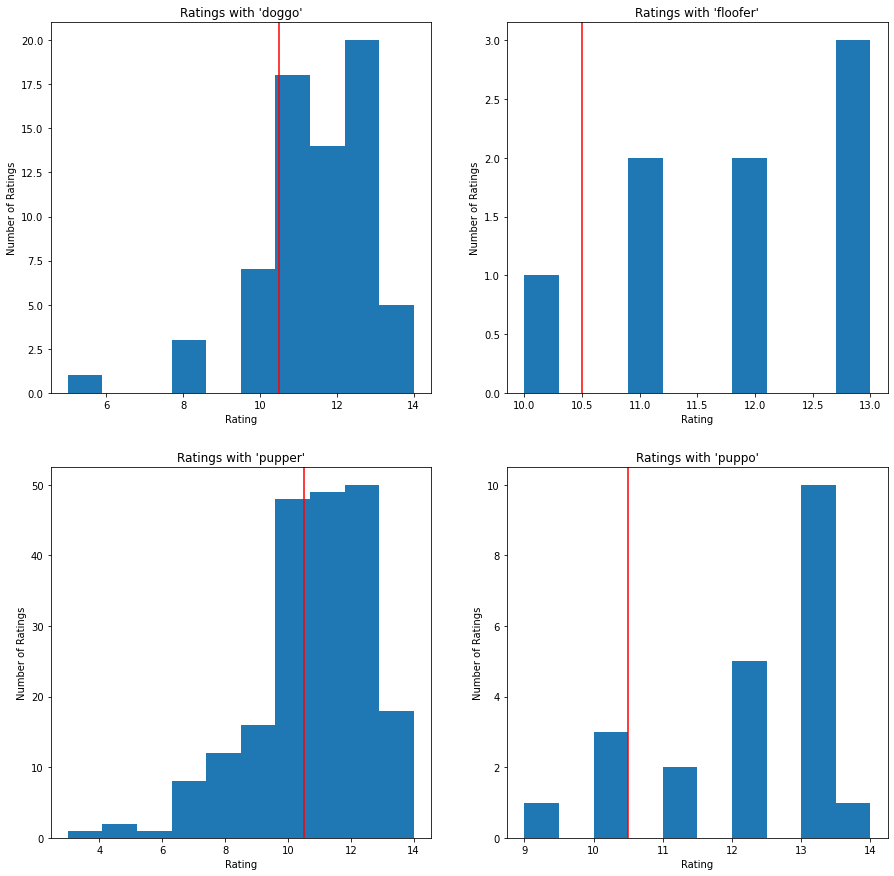

In [47]:
mean_rating = df.rating_numerator.mean()
pupper = df.query("'pupper' in dog_stage or 'doggo,pupper' in dog_stage")
doggo = df.query("'doggo' in dog_stage or 'doggo,pupper' in dog_stage or 'doggo,floofer' in dog_stage or 'doggo,puppo' in dog_stage")
puppo = df.query("'puppo' in dog_stage or 'doggo,puppo' in dog_stage")
floofer = df.query("'floofer' in dog_stage or 'doggo,floofer' in dog_stage")

fig = plt.figure(figsize=(15, 15))

i = 1
titles = ["Ratings with 'doggo'", "Ratings with 'floofer'", "Ratings with 'pupper'", "Ratings with 'puppo'"]
for df_ in [doggo, floofer, pupper, puppo] :
    ax = plt.subplot(2, 2, i);
    ax.hist(df_['rating_numerator'], histtype='bar');
    ax.set_ylabel('Number of Ratings')
    ax.set_xlabel('Rating')
    ax.set_title(titles[i-1])
    plt.axvline(x=mean_rating, color='red')
    i += 1
plt.show();